# Practical 1: Introduction to Computational Geosciences

## 1. Overview

The goal of this practical is to get you familiar with how Jupyter Notebook (JN) works with a Python kernel, and introduce you to some basic computational tools. You may well have encountered JN in previous courses, in which case this practical may be quite straight forwards. However, there is nothing like a bit of repetition to "ensure maximum retension".

A typical Notebook is composed of a series of cells, which may contain code or text. If it contains code to be executed, then this can be done by pressing "SHIFT+ENTER" - try it with the cell below.

In [3]:
print('This all looks pretty easy')

This all looks pretty easy


In general, when you use JN to tackle practical geoscience problems, you will need to import libraries and declare variables. Once this has been done, they will be available for all other cells. 

Let's start off by importing NumPy, which is the fundamental library for scientific computing in Python.

In [4]:
import numpy as np

If you type "SHIFT+ENTER" in the above cell, all that seems to happen is that you move on to the next cell. However, the libraries have now been imported, and you can tell that this has happened because a number now appears in the Import tag "In [m]", where m is an integer. This integer indicates the number of times a code execution has taken place in the entire notebook. Thus, if you type "SHIFT+ENTER" again in this cell, the Import tag will change to "In [m+1]". If you then go to another cell and enter "SHIFT+ENTER", its tag will change to "In [m+2]".

Now that numpy has been imported, let's do some basic maths, and start by defining a simple function.

In [5]:
def square(y):
           return y*y

Once this cell has been executed, then this function can be called from any other cell. Here, we compute this function with a random integer between 1 and 100 generated from NumPy: 

In [6]:
y=np.random.randint(1,100)
z=square(y)
print('%d squared is %d' % (y,z))

32 squared is 1024


# 2. Plotting simple graphs

One of the nice things about JN is that it is easy to make plots from the output of code that you have written. The code below plots a simple sinusoid between 0 and 2$\pi$. 

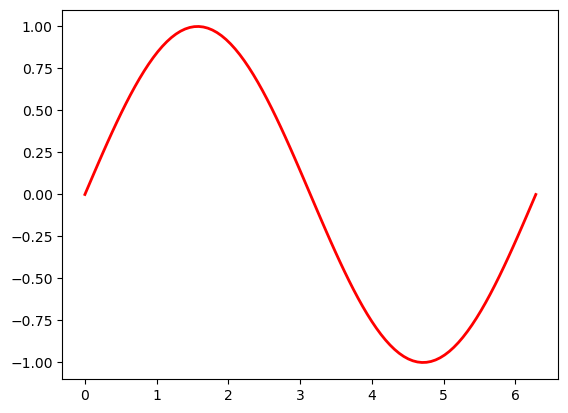

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.linspace(0,2*np.pi,100)
plt.plot(x,np.sin(x), lw=2, color='red');

The code first imports a library called matplotlib.pyplot. Matplotlib is a comprehesive library for creating static, animated and interactive visualizations in Python. Pyplot is a collection of functions that makes matplotlib work like MATLAB.

The second line is included so that when the plt.plot command is executed, the figure is automatically dumped to screen.

The next line specifies the sampling in x using the linspace function from NumPy. Here, 100 evenly spaced samples are taken between 0 and $2\pi$. Try changing the number of samples to 10 and see what happens. The last line plots y vs x data as a continuous red line, with a line width of 2. 

The next type of plot we will generate is a histogram. To generate our dataset, we will use a NumPy function that produces random noise with a standard distribution. The mean of this standard distribution (mu) and its standard deviation (sigma) need to be defined, as well as the number of samples.


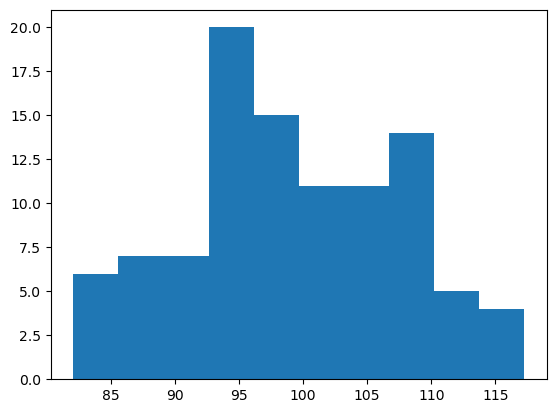

In [8]:
mu=100
sigma=10
y=np.random.normal(mu,sigma, size=100)
plt.hist(y,10);

Try playing around with these values - for example, change mu to 10000 and sigma to 100 - what does the plot look like?

# 3. Contours, colourmaps and surfaces.

In the next example, we will plot contours using the ax.contour(X,Y,Z) function of Matplotlib. The X and Y variables specify the sampling in the plane, and the Z values are the contour values. 

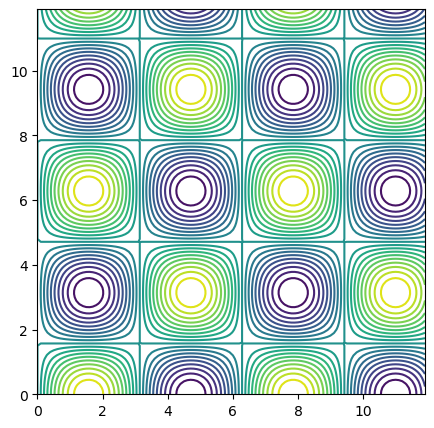

In [9]:
x = np.arange(0.0, 12.0, 0.1)
y = np.arange(0.0, 12.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)
fig, ax = plt.subplots(figsize=(5,5))
ax.contour(X,Y,Z, 20);

np.arange returns an array object containing evenly spaced values within a defined interval. Meshgrid creates a rectangular grid out of an array of x and y values. The function that is plotted is simply the product of a sin(X) and cos(Y). The second last line creates a figure and a grid of subplots - in this case just one - and allows the attributes of the figure to be controlled; in this case specifying the  size as 5x5 cm. The last line plots the contour, using 20 intervals.

It is also possible to define a contour plot by area instead of lines by using ax.contourf() instead of ax.contour, as below:

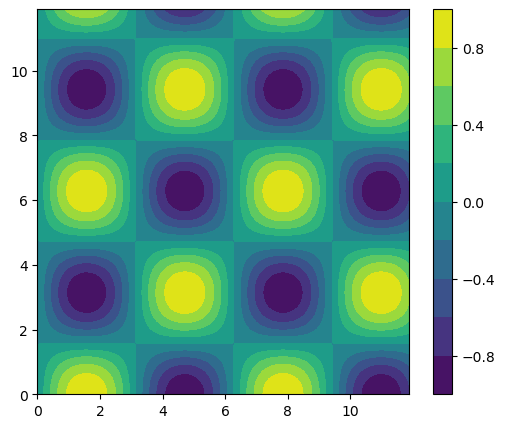

In [10]:
fig, ax = plt.subplots(figsize=(6,5))
cf=ax.contourf(X,Y,Z, 10)
fig.colorbar(cf, ax=ax);

A colourbar has also been added via the fic.colorbar command. A continuous color scale can be achieved by increasing the number of intervals - for example, try a value of 50 instead of 10. Note that a default colormap is used for the above, and other choices exist, which can be invoked by the cmap function, as below:

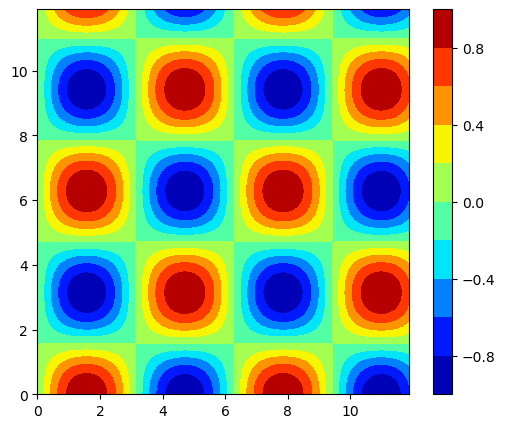

In [11]:
fig, ax = plt.subplots(figsize=(6,5))
cf=ax.contourf(X,Y,Z, 10, cmap='jet')
fig.colorbar(cf, ax=ax);

The last exercise in this section looks at plotting surfaces. This can be accomplished using ax.plot_surface(X,Y,Z). A simple example is illustrated below:

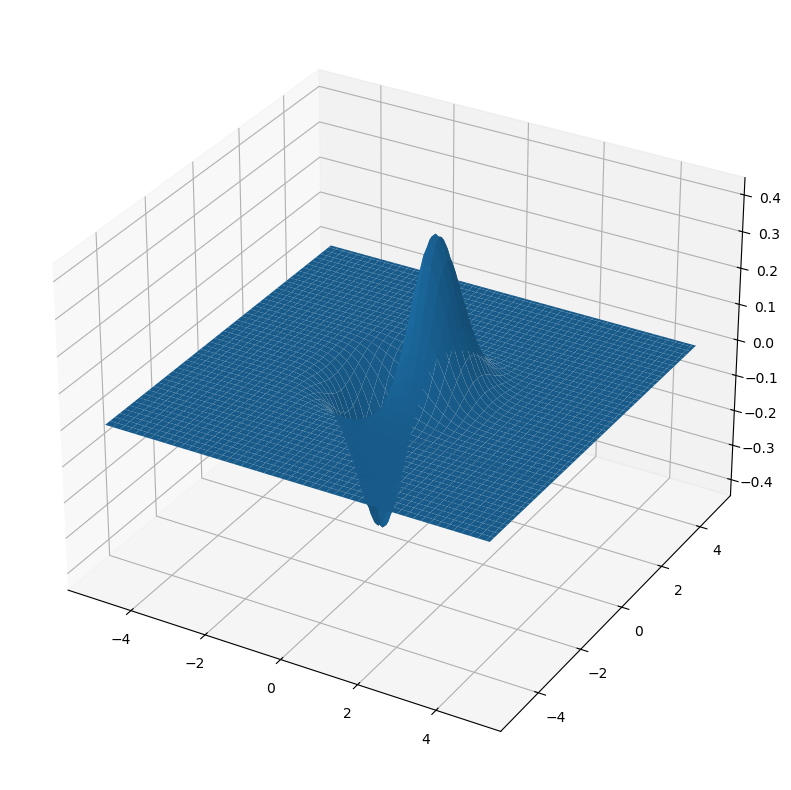

In [12]:
from mpl_toolkits.mplot3d import axes3d
# set up 3-D grid of points
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)
fig = plt.figure(figsize=(10,10))
# In the line below "111" means 1x1 grid of subplots, with the current subplot placed
# in the top left grid. Of course, for a 1x1 grid, there is only one option!
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z);

# 3. Conditional statements and loops

Conditional statements are an inherent part of computer coding. The code below demonstrates the use of an "if" statement:

In [13]:
a = 20
b = 25
if a == b:
    print('yes')
else:
    print('no')

no


As you can see, if you set a=b, then the answer will be yes, not no. Note the colons at the end of "if" and "else", and that the result of the condition being satisfied is indented. It is also possible to have a sequence of conditions, as demonstrated below:

In [14]:
x=1111221
if x % 4 == 0 and len(str(x)) > 7:
   print("x is divisible by 4 and is greater than 9999999")
elif x % 4 == 0 or len(str(x)) > 2:
   print("x is divisible by 4 or x is greater than 99")
elif x % 9 == 0 and len(str(x)) > 4:
   print("x is divisible by 9")
else:
    print("None of the above")

x is divisible by 4 or x is greater than 99


In the above, "elif" means "else if". x % 4 refers to the modulus, or remainder of taking x/4. If this equals zero, then the condition is satisfied. len(str(x)) refers to the length of the string, or number of digits that make up x. Is it obvious why we get this particular output? In the first "elif" statement, try changing "or" to "and" and see what happens.

Now we will investigate loops. One common type of loop is a for-loop, an example of which is provided below:

In [15]:
total=0
for num in (-10,-8,-6,-4,-2,0,2,4,6,8,10):
    if num > 0:
        total=total+num
print(total)

30


Is it clear why you get this result? 

The next kind of loop we examine is a while-loop. It allows you to repeat a block of code until a condition is no longer true. Take the example below:

In [16]:
total = 0
m=0
mu=0
sigma=5
n=100
y=np.random.normal(mu,sigma,size=n)
while m < n:
    total=total+y[m]
    m += 1
print(total)

27.313844347774157


Note that the above could be written more efficiently as

In [17]:
print(np.sum([np.random.normal(mu,sigma) for _ in range(n)]))

-100.04308744404027


# 4. Importing data

So far, all the manipulation of numbers has been internal to the code, but in practice, we will want to import data. A great library for handling datasets is Pandas, and it can be imported using

In [18]:
import pandas as pd

In the same directory that you launched this practical from, there should also be a file called teleseismicZ.txt, and it can be read in and plotted as follows

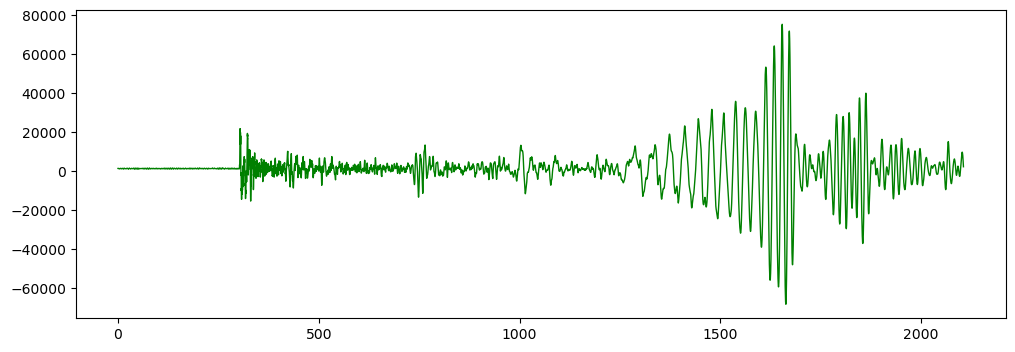

In [19]:
filename='teleseismicZ.txt'
data=pd.read_csv(filename, header=None, delimiter=r"\s+").values
x=data[:,0]
y=data[:,1]
plt.figure(figsize=(12,4))
plt.plot(x,y, lw=1, color='green');

The input parameters used above indicate that there is no header present, and that there is variable white space between the columns. The data are saved as an array called data, and this is separated into x and y variables before being plotted.

Does the above plot look familiar? It's a very nice teleseismic waveform used in one of my part 2 practicals for earthquake location. As well as multiple body wave arrivals, the dispersive wavetrain shows up very clearly.

# 5. Optional exercise

If you have any time left, you might want to try the following: In addition to teleseismicZ.txt (vertical component seismogram), there is also teleseismicE.txt (E-W component) and teleseismicN.txt (N-S component). Try writing a script that will plot all three commponents in a single figure, in the order Z, N, E. As an added challenge, try colouring the plots as blue, green and red respectively (for Z, N and E), and add labels to identify each component.

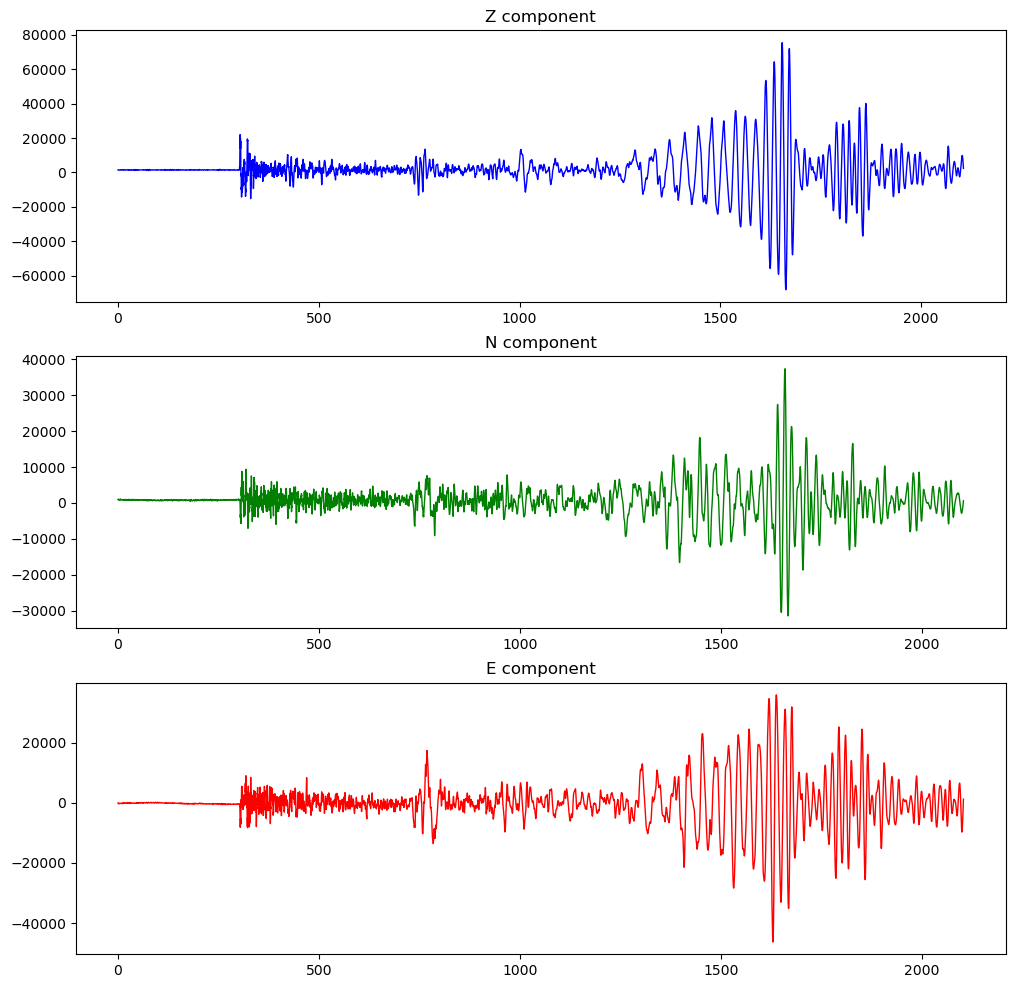

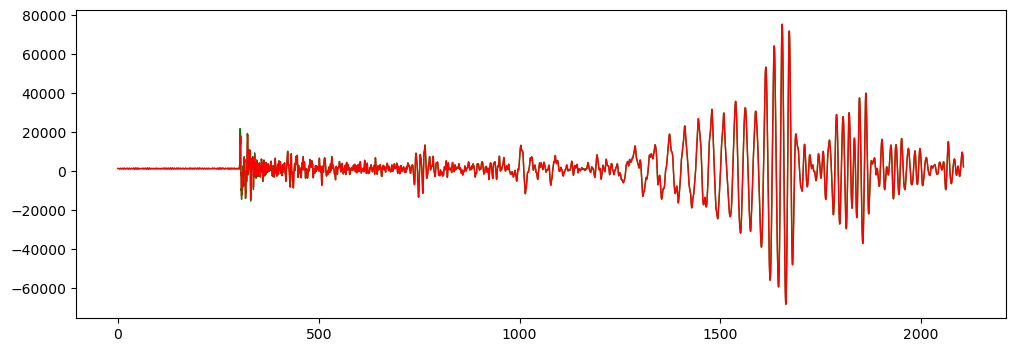

In [36]:
fig, axs = plt.subplots(3,1, figsize=(12,12))
col = ["blue","green","red"]

for i, letter in enumerate(["Z","N","E"]):
    filename=f'teleseismic{letter}.txt'
    data=pd.read_csv(filename, header=None, delimiter=r"\s+").values
    x=data[:,0]
    y=data[:,1]
    axs[i].plot(x,y, lw=1, color=col[i])
    axs[i].set_title(f'{letter} component')

plt.show()